## O que é o retorno esperado / esperança matemática?

- Em termos simples, a esperança matemática é o valor que você esperaria obter em média ao repetir um experimento aleatório muitas vezes. Ela é calculada multiplicando cada resultado possível pelo seu respectivo valor esperado e somando todos esses produtos.



<img src="esperanca.png" alt="Texto Alternativo" width="300">

### No trading podemos resumir esta fórmula como:

(MEDIA DE GANHOS * PROBABILIDADE DE GANHO)-(MEDIA DE PERDAS * PROBABILIDADE DE PERDA)

In [16]:
# carregando libraries
import os
import pandas as pd
import numpy as np
from datetime import datetime
import pickle

import shap # v0.39.0
shap.initjs()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid", context = "talk", palette = "rainbow")

import warnings
warnings.filterwarnings('ignore')

In [17]:
# Definir o intervalo desejado
lower_bound = -10
upper_bound = 12

# Gerar 1000 números aleatórios no intervalo
num_samples = 1000
random_numbers = np.random.uniform(low=lower_bound, high=upper_bound, size=num_samples)

estrategia_1 = pd.DataFrame(random_numbers, columns = ["resultado"])
estrategia_1

,resultado
0,-8.287525
1,-7.986512
2,9.103854
3,7.908915
4,4.172561
...,...
995,4.755882
996,5.755927
997,-4.311449
998,4.835412


<AxesSubplot: title={'center': 'Retornos acumulados da estratégia 1'}>

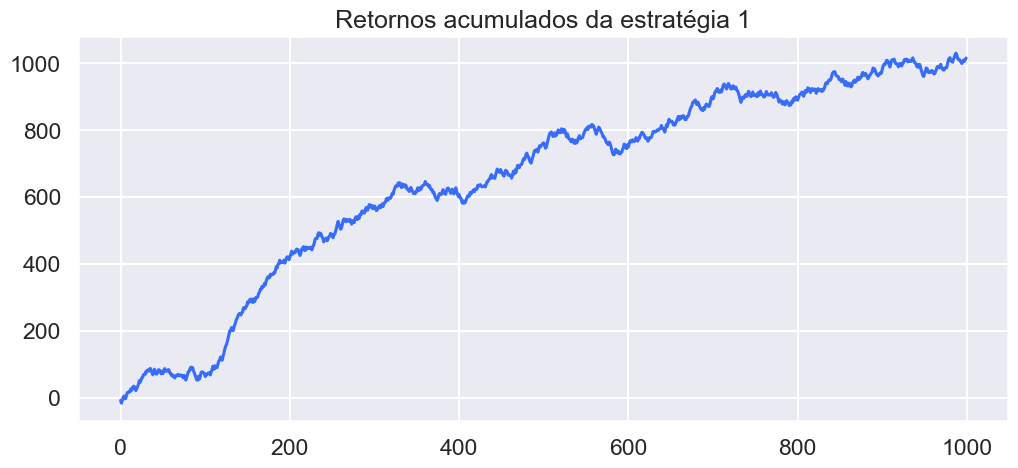

In [19]:
estrategia_1["resultado_acumulado"] = estrategia_1["resultado"].cumsum()

plt.title("Retornos acumulados da estratégia 1")
estrategia_1["resultado_acumulado"].plot(figsize = (12,5))

In [60]:
media_ganhos = estrategia_1["resultado"][estrategia_1["resultado"]>0].mean()
media_perdas = estrategia_1["resultado"][estrategia_1["resultado"]<0].mean()

prob_ganho = estrategia_1["resultado"][estrategia_1["resultado"]>0].shape[0]/estrategia_1["resultado"].shape[0]
prob_perda = estrategia_1["resultado"][estrategia_1["resultado"]<0].shape[0]/estrategia_1["resultado"].shape[0]

print("A media de ganhos é: ",round(media_ganhos,2))
print("A media de perdas é: ",round(media_perdas,2))
print("A probabilidade de ganho é: ",round(prob_ganho*100,2),"%")
print("A probabilidade de perda é: ",round(prob_perda*100,2),"%")

A media de ganhos é:  5.98
A media de perdas é:  -5.05
A probabilidade de ganho é:  55.0 %
A probabilidade de perda é:  45.0 %


In [61]:
(media_ganhos*prob_ganho)-(abs(media_perdas)*prob_perda)

1.014404266858917

<AxesSubplot: title={'center': 'Retornos acumulados da estratégia 2'}>

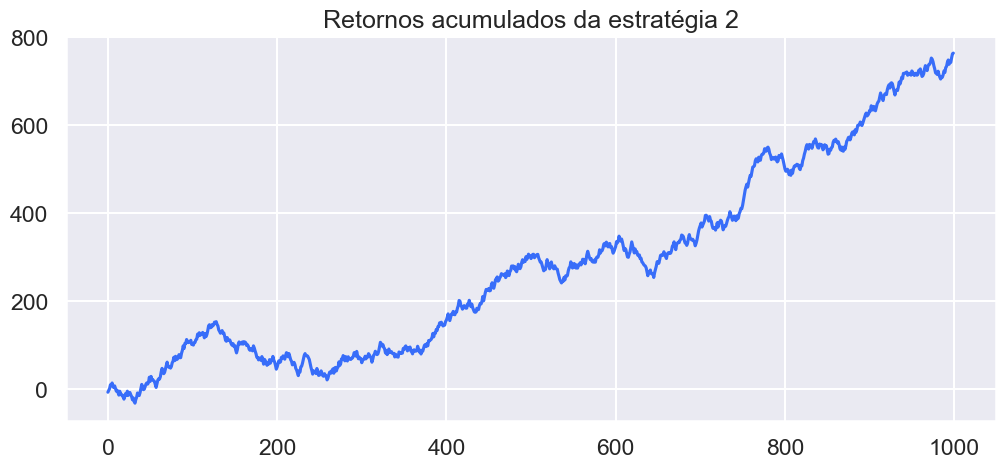

In [20]:
# Definir o intervalo desejado
lower_bound = -10
upper_bound = 12

# Gerar 1000 números aleatórios no intervalo
num_samples = 1000
random_numbers = np.random.uniform(low=lower_bound, high=upper_bound, size=num_samples)

estrategia_2 = pd.DataFrame(random_numbers, columns = ["resultado"])

estrategia_2["resultado_acumulado"] = estrategia_2["resultado"].cumsum()

plt.title("Retornos acumulados da estratégia 2")
estrategia_2["resultado_acumulado"].plot(figsize = (12,5))

In [58]:
media_ganhos = estrategia_2["resultado"][estrategia_2["resultado"]>0].mean()
media_perdas = estrategia_2["resultado"][estrategia_2["resultado"]<0].mean()

prob_ganho = estrategia_2["resultado"][estrategia_2["resultado"]>0].shape[0]/estrategia_2["resultado"].shape[0]
prob_perda = estrategia_2["resultado"][estrategia_2["resultado"]<0].shape[0]/estrategia_2["resultado"].shape[0]

print("A media de ganhos é: ",round(media_ganhos,2))
print("A media de perdas é: ",round(media_perdas,2))
print("A probabilidade de ganho é: ",round(prob_ganho*100,2),"%")
print("A probabilidade de perda é: ",round(prob_perda*100,2),"%")

A media de ganhos é:  5.94
A media de perdas é:  -4.98
A probabilidade de ganho é:  52.6 %
A probabilidade de perda é:  47.4 %


In [59]:
(media_ganhos*prob_ganho)-(abs(media_perdas)*prob_perda)

0.7638557851222227

<AxesSubplot: title={'center': 'Retornos acumulados da estratégia 3'}>

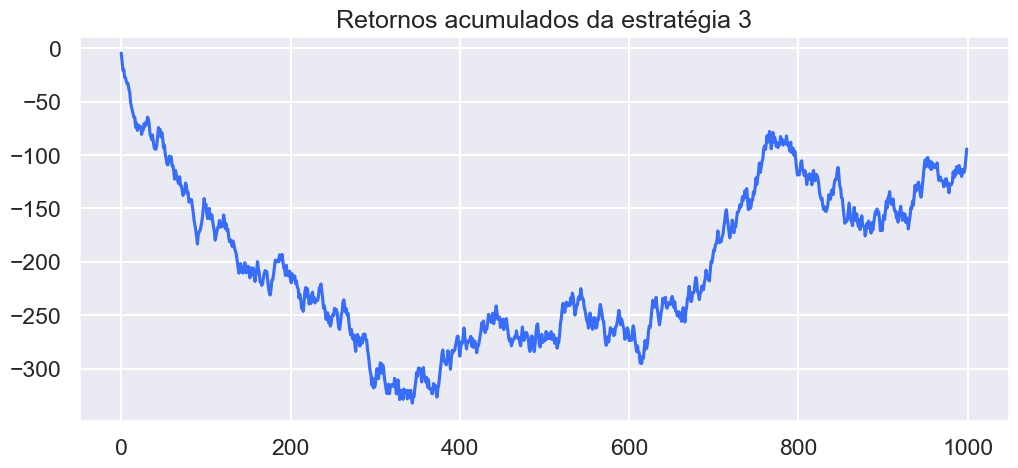

In [40]:
# Definir o intervalo desejado
lower_bound = -10
upper_bound = 10

# Gerar 1000 números aleatórios no intervalo
num_samples = 1000
random_numbers = np.random.uniform(low=lower_bound, high=upper_bound, size=num_samples)

estrategia_3 = pd.DataFrame(random_numbers, columns = ["resultado"])

estrategia_3["resultado_acumulado"] = estrategia_3["resultado"].cumsum()

plt.title("Retornos acumulados da estratégia 3")
estrategia_3["resultado_acumulado"].plot(figsize = (12,5))

In [56]:
media_ganhos = estrategia_3["resultado"][estrategia_3["resultado"]>0].mean()
media_perdas = estrategia_3["resultado"][estrategia_3["resultado"]<0].mean()

prob_ganho = estrategia_3["resultado"][estrategia_3["resultado"]>0].shape[0]/estrategia_3["resultado"].shape[0]
prob_perda = estrategia_3["resultado"][estrategia_3["resultado"]<0].shape[0]/estrategia_3["resultado"].shape[0]

print("A media de ganhos é: ",round(media_ganhos,2))
print("A media de perdas é: ",round(media_perdas,2))
print("A probabilidade de ganho é: ",round(prob_ganho*100,2),"%")
print("A probabilidade de perda é: ",round(prob_perda*100,2),"%")

A media de ganhos é:  4.89
A media de perdas é:  -4.98
A probabilidade de ganho é:  49.5 %
A probabilidade de perda é:  50.5 %


In [57]:
(media_ganhos*prob_ganho)-(abs(media_perdas)*prob_perda)

-0.09441955328655771

<AxesSubplot: >

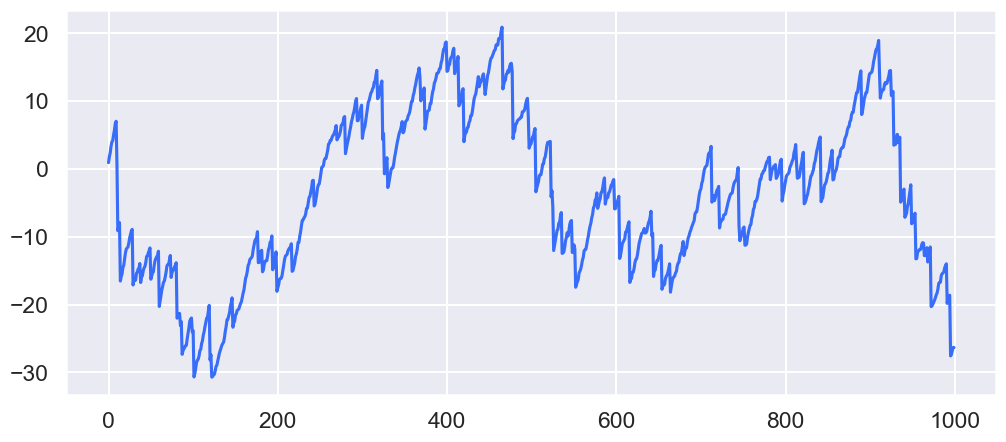

In [79]:
import numpy as np
import pandas as pd

# Gerar 1000 números aleatórios no intervalo com restrições
num_samples = 1000

positive_numbers = np.random.uniform(low=0, high=1, size=int(num_samples * 0.90))
negative_numbers = np.random.uniform(low=-10, high=0, size=num_samples - len(positive_numbers))

random_numbers = np.concatenate((positive_numbers, negative_numbers))

# Embaralhar os números gerados
np.random.shuffle(random_numbers)

estrategia_3 = pd.DataFrame(random_numbers, columns=["resultado"])

estrategia_3["resultado_acumulado"] = estrategia_3["resultado"].cumsum()

estrategia_3["resultado_acumulado"].plot(figsize = (12,5))

In [80]:
media_ganhos = estrategia_3["resultado"][estrategia_3["resultado"]>0].mean()
media_perdas = estrategia_3["resultado"][estrategia_3["resultado"]<0].mean()

prob_ganho = estrategia_3["resultado"][estrategia_3["resultado"]>0].shape[0]/estrategia_3["resultado"].shape[0]
prob_perda = estrategia_3["resultado"][estrategia_3["resultado"]<0].shape[0]/estrategia_3["resultado"].shape[0]

print("A media de ganhos é: ",round(media_ganhos,2))
print("A media de perdas é: ",round(media_perdas,2))
print("A probabilidade de ganho é: ",round(prob_ganho*100,2),"%")
print("A probabilidade de perda é: ",round(prob_perda*100,2),"%")

A media de ganhos é:  0.49
A media de perdas é:  -4.68
A probabilidade de ganho é:  90.0 %
A probabilidade de perda é:  10.0 %


In [83]:
((media_ganhos*prob_ganho)-(abs(media_perdas)*prob_perda))*1000

-26.325935740860118